# Project: Loan Prediction

In [1]:
# Importing necessary Libraries
import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.metrics import accuracy_score

In [2]:
# Reading 'train.csv' and 'test.csv' files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [8]:
# Filling Missing features by forward fill method
train['Gender'].fillna(method = 'ffill',inplace = True)
test['Gender'].fillna(method = 'ffill', inplace = True)

In [9]:
train['Dependents'].fillna(method = 'ffill',inplace = True)
test['Dependents'].fillna(method = 'ffill',inplace = True)

In [10]:
# 'Self_Employed' is not a important feature. So we can drop this feature 
train.drop('Self_Employed',axis = 1,inplace = True)
test.drop('Self_Employed', axis = 1, inplace = True)

In [11]:
# Filling NaN values of 'LoanAmount' and 'Loan_Amount_Term' by the average values of repective features
train['LoanAmount'].replace(np.nan,np.mean(train['LoanAmount']),inplace = True)
test['LoanAmount'].replace(np.nan,np.mean(test['LoanAmount']),inplace = True)

In [12]:
train['Loan_Amount_Term'].replace(np.nan,np.mean(train['Loan_Amount_Term']),inplace = True)
test['Loan_Amount_Term'].replace(np.nan,np.mean(test['Loan_Amount_Term']),inplace = True)

In [13]:
train['Credit_History'].fillna(method = 'ffill',inplace = True)
test['Credit_History'].fillna(method = 'ffill',inplace = True)

In [14]:
train.dropna(axis = 0,inplace = True)

In [15]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,6000,0.0,141.000000,360.0,1.0,Urban,Y


Replacing all the string values with numeric values and making categories

In [17]:
train['Gender']=train['Gender'].apply(lambda x: 1 if x=='Male' else 0)

In [18]:
test['Gender']=test['Gender'].apply(lambda x: 1 if x=='Male' else 0)

In [19]:
train['Married']=train['Married'].apply(lambda x: 1 if x=='Yes' else 0)
test['Married']=test['Married'].apply(lambda x: 1 if x=='Yes' else 0)

In [20]:
d = {'0':0,'1':1,'2':2,'3+':4}
train['Dependents'] = train['Dependents'].map(d)

In [21]:
test['Dependents'] = test['Dependents'].map(d)

In [22]:
train['Education'] = train['Education'].apply(lambda x: 1 if x == 'Graduate' else 0)
test['Education'] = test['Education'].apply(lambda x: 1 if x == 'Graduate' else 0)

In [23]:
d = {'Urban': 1, 'Semiurban':2,'Rural':3}
train['Property_Area'] = train['Property_Area'].map(d)
test['Property_Area'] = test['Property_Area'].map(d)

In [24]:
train['Loan_Status'] = train['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)

In [25]:
train.drop('Loan_ID',axis =1,inplace = True)
test.drop('Loan_ID',axis =1,inplace = True)

In [26]:
train.head()

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,1,4583,1508.0,128.000000,360.0,1.0,3,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,1,6000,0.0,141.000000,360.0,1.0,1,1


In [27]:
test.head()

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,5720,0,110.0,360.0,1.0,1
1,1,1,1,1,3076,1500,126.0,360.0,1.0,1
2,1,1,2,1,5000,1800,208.0,360.0,1.0,1
3,1,1,2,1,2340,2546,100.0,360.0,1.0,1
4,1,0,0,0,3276,0,78.0,360.0,1.0,1


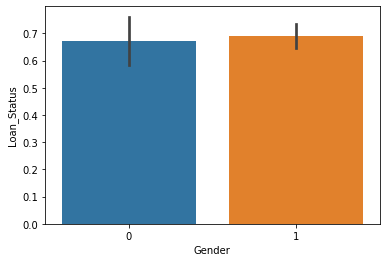

In [28]:
sns.barplot(x = 'Gender', y='Loan_Status', data = train)

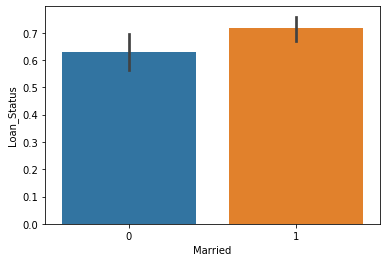

In [29]:
sns.barplot(x = 'Married', y = 'Loan_Status', data = train)

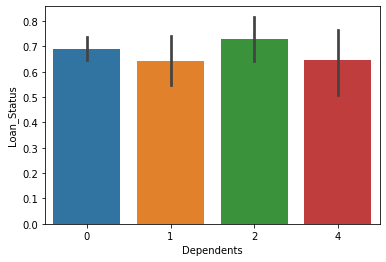

In [30]:
sns.barplot(x = 'Dependents', y = 'Loan_Status', data = train)

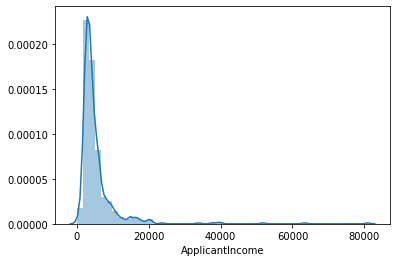

In [31]:
sns.distplot(train['ApplicantIncome'])

In [32]:
bins = [0,1000,2500,5000,10000,100000]
labels = ['Lower_1 Class','Lower_2 Class','Middle_1 Class','Middle_2 Class','Upper_1 Class']
a = pd.cut(train['ApplicantIncome'], bins = bins, labels = labels)

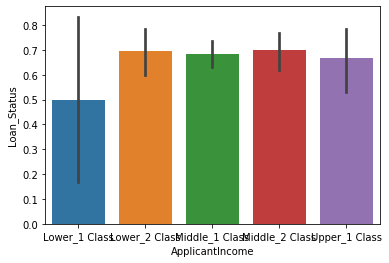

In [33]:
sns.barplot(y = train['Loan_Status'],x = a)

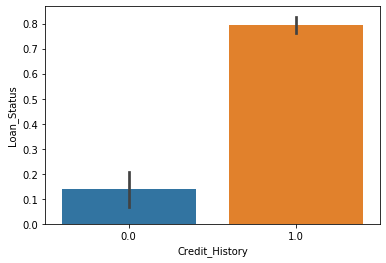

In [34]:
sns.barplot(x = 'Credit_History', y = 'Loan_Status', data = train )

> 'Credit_History' is the important feature for predicting results. Credit_History is the history that a person took loan in the past or not.

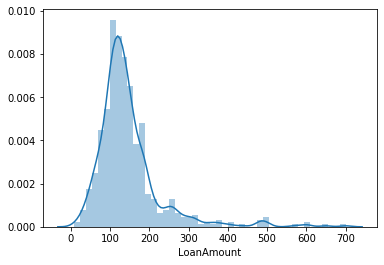

In [35]:
sns.distplot(train['LoanAmount'])

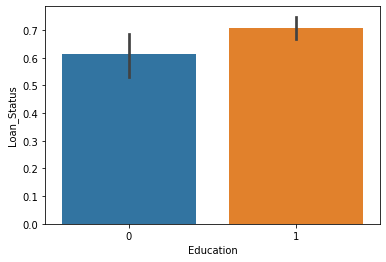

In [36]:
sns.barplot(x = 'Education',y = 'Loan_Status', data = train)

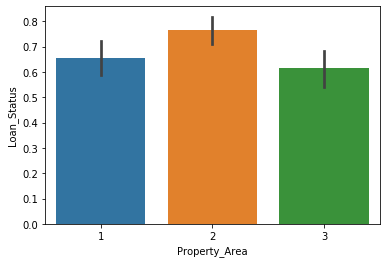

In [37]:
sns.barplot(x = 'Property_Area', y = 'Loan_Status', data = train)

In [38]:
X = train.drop('Loan_Status',axis = 1)
y = train['Loan_Status']

### Using different models for predicting 'Loan_Status' of other people

In [39]:
# Splitting the model into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 7)

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
y_pred = model.predict(X_test)

In [42]:
log_acc = accuracy_score(y_test,y_pred)
print('Logistic Regression Accuracy: ',log_acc)

Logistic Regression Accuracy:  0.8870967741935484


In [43]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [44]:
y_pred = model.predict(X_test)

In [45]:
knn_acc = accuracy_score(y_test,y_pred)
print('K-Nearest Neighbors Accuracy:',knn_acc)

K-Nearest Neighbors Accuracy: 0.6774193548387096


In [46]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
y_pred = model.predict(X_test)

In [48]:
svc_acc = accuracy_score(y_test,y_pred)
print('SVC Accuracy: ',svc_acc)

SVC Accuracy:  0.7741935483870968


In [49]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
y_pred = model.predict(X_test)

In [51]:
dt_acc = accuracy_score(y_test,y_pred)
print('Decision Tree Accuracy: ',dt_acc)

Decision Tree Accuracy:  0.7741935483870968


In [52]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
y_pred = model.predict(X_test)

In [54]:
rf_acc = accuracy_score(y_test,y_pred)
print('Random Forest Accuracy: ',rf_acc)

Random Forest Accuracy:  0.8709677419354839


In [55]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [56]:
y_pred = model.predict(X_test)

In [57]:
gb_acc = accuracy_score(y_test, y_pred)
print('Gradient Boosting Accuracy: ',gb_acc)

Gradient Boosting Accuracy:  0.8870967741935484


In [58]:
models = pd.DataFrame({
    'Models':['Logistic Regression','K-Nearest Neighbors','Support Vector Machine','Decision Tree',
             'Random Forest','Gradient Boosting'],
    'Accuracy':[log_acc, knn_acc,svc_acc,dt_acc,rf_acc,gb_acc]
})
models.sort_values(by='Accuracy',ascending = False)

,Models,Accuracy
0,Logistic Regression,0.887097
5,Gradient Boosting,0.887097
4,Random Forest,0.870968
2,Support Vector Machine,0.774194
3,Decision Tree,0.774194
1,K-Nearest Neighbors,0.677419


> **Logistic Regression** and **Gradient Boosting** gives the best accuracy.

In [59]:
# Using LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(test)

In [60]:
test['Loan_Status'] = y_pred

In [61]:
test.head(20)

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,1,5720,0,110.0,360.0,1.0,1,1
1,1,1,1,1,3076,1500,126.0,360.0,1.0,1,1
2,1,1,2,1,5000,1800,208.0,360.0,1.0,1,1
3,1,1,2,1,2340,2546,100.0,360.0,1.0,1,1
4,1,0,0,0,3276,0,78.0,360.0,1.0,1,1
5,1,1,0,0,2165,3422,152.0,360.0,1.0,1,1
6,0,0,1,0,2226,0,59.0,360.0,1.0,2,1
7,1,1,2,0,3881,0,147.0,360.0,0.0,3,0
8,1,1,2,1,13633,0,280.0,240.0,1.0,1,1
9,1,0,0,0,2400,2400,123.0,360.0,1.0,2,1
